# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [89]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.6, 即時現金賣出: 30.27


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [10]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢其他貨幣對台幣的匯率
for ele in rate_table:
    currency = ele.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 去掉空白

    buy_rate = ele.find(name='td', attrs={'data-table':'本行現金買入'})
    sell_rate = ele.find(name='td', attrs={'data-table':'本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.64, 即時現金賣出: 30.31

港幣(HKD)

即時現金買入: 3.71, 即時現金賣出: 3.914

英鎊(GBP)

即時現金買入: 38.09, 即時現金賣出: 40.21

澳幣(AUD)

即時現金買入: 19.34, 即時現金賣出: 20.12

加拿大幣(CAD)

即時現金買入: 21.51, 即時現金賣出: 22.42

新加坡幣(SGD)

即時現金買入: 21.11, 即時現金賣出: 22.02

瑞士法郎(CHF)

即時現金買入: 31.52, 即時現金賣出: 32.72

日圓(JPY)

即時現金買入: 0.2816, 即時現金賣出: 0.2944

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: 2.79, 即時現金賣出: 3.31

紐元(NZD)

即時現金買入: 18.51, 即時現金賣出: 19.36

泰幣(THB)

即時現金買入: 0.8283, 即時現金賣出: 1.0183

菲國比索(PHP)

即時現金買入: 0.521, 即時現金賣出: 0.654

印尼幣(IDR)

即時現金買入: 0.00173, 即時現金賣出: 0.00243

歐元(EUR)

即時現金買入: 33.46, 即時現金賣出: 34.8

韓元(KRW)

即時現金買入: 0.02333, 即時現金賣出: 0.02723

越南盾(VND)

即時現金買入: 0.00092, 即時現金賣出: 0.00142

馬來幣(MYR)

即時現金買入: 5.986, 即時現金賣出: 7.611

人民幣(CNY)

即時現金買入: 4.228, 即時現金賣出: 4.39


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



,buy_rate,sell_rate
date,,
2020/02/03,29.860,30.530
2020/02/04,29.740,30.410
2020/02/05,29.695,30.365
2020/02/06,29.635,30.305
2020/02/07,29.705,30.375
2020/02/10,29.650,30.320
2020/02/11,29.630,30.300
2020/02/12,29.595,30.265
2020/02/13,29.580,30.250


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

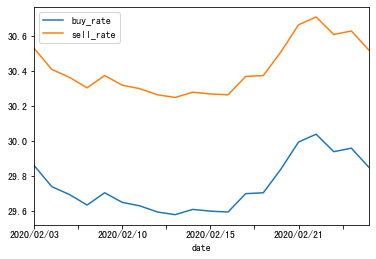

In [43]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-02")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
HistoryExchangeRate
# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

#### Pandas內建read from html

In [127]:
import pandas as pd

table = pd.read_html('https://rate.bot.com.tw/xrt/quote/2020-02/USD',)
len(table)
table

1

[          掛牌日期                幣別    現金匯率         Unnamed: 5_level_0  \
           掛牌日期      本行買入      幣別    本行賣出    本行買入               本行賣出   
 0   2020/02/27  美金 (USD)  29.850  30.520  30.200             30.300   
 1   2020/02/26  美金 (USD)  29.960  30.630  30.310             30.410   
 2   2020/02/25  美金 (USD)  29.940  30.610  30.290             30.390   
 3   2020/02/24  美金 (USD)  30.040  30.710  30.390             30.490   
 4   2020/02/21  美金 (USD)  29.995  30.665  30.345             30.445   
 5   2020/02/20  美金 (USD)  29.840  30.510  30.190             30.290   
 6   2020/02/19  美金 (USD)  29.705  30.375  30.055             30.155   
 7   2020/02/18  美金 (USD)  29.700  30.370  30.050             30.150   
 8   2020/02/17  美金 (USD)  29.595  30.265  29.945             30.045   
 9   2020/02/15  美金 (USD)  29.600  30.270  29.950             30.050   
 10  2020/02/14  美金 (USD)  29.610  30.280  29.960             30.060   
 11  2020/02/13  美金 (USD)  29.580  30.250  29.930             30

In [161]:
df = pd.DataFrame(table[0],)
df[:5]

掛牌日期                幣別    現金匯率         Unnamed: 5_level_0  \
         掛牌日期      本行買入      幣別    本行賣出    本行買入               本行賣出   
0  2020/02/27  美金 (USD)  29.850  30.520  30.200             30.300   
1  2020/02/26  美金 (USD)  29.960  30.630  30.310             30.410   
2  2020/02/25  美金 (USD)  29.940  30.610  30.290             30.390   
3  2020/02/24  美金 (USD)  30.040  30.710  30.390             30.490   
4  2020/02/21  美金 (USD)  29.995  30.665  30.345             30.445   

                即期匯率                    Unnamed: 8_level_0  
  Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1  
0                NaN                NaN                NaN  
1                NaN                NaN                NaN  
2                NaN                NaN                NaN  
3                NaN                NaN                NaN  
4                NaN                NaN                NaN

In [167]:
newdf = (pd.concat((df["掛牌日期"]["掛牌日期"],df["現金匯率"]),axis=1,))
newdf[:5]

,掛牌日期,本行賣出,本行買入
0,2020/02/27,30.520,30.200
1,2020/02/26,30.630,30.310
2,2020/02/25,30.610,30.290
3,2020/02/24,30.710,30.390
4,2020/02/21,30.665,30.345


In [169]:
newdf = newdf.set_index('掛牌日期')
newdf = newdf.sort_index(ascending=True)
newdf

,本行賣出,本行買入
掛牌日期,,
2020/02/03,30.530,30.210
2020/02/04,30.410,30.090
2020/02/05,30.365,30.045
2020/02/06,30.305,29.985
2020/02/07,30.375,30.055
2020/02/10,30.320,30.000
2020/02/11,30.300,29.980
2020/02/12,30.265,29.945
2020/02/13,30.250,29.930


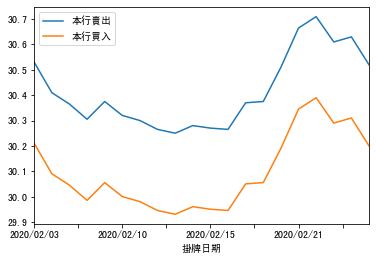

In [133]:
newdf.plot()

#### 爬蟲

單一

In [ ]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt/quote/2020-02/USD"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")

In [107]:
dates = [x.text for x in html.select(".table-hover a")]
buyin = list(map(float,[x.text for x in  html.select(".tablet_hide+ .text-right")]))
sold = list(map(float,[x.text for x in  html.select(".print_table-cell+ .rate-content-cash.text-right")]))

df = pd.DataFrame({"掛牌日期":dates,
                   "本行買入":buyin,
                   "本行賣出":sold,
                  })

df

,掛牌日期,本行買入,本行賣出
0,2020/02/27,29.850,30.520
1,2020/02/26,29.960,30.630
2,2020/02/25,29.940,30.610
3,2020/02/24,30.040,30.710
4,2020/02/21,29.995,30.665
5,2020/02/20,29.840,30.510
6,2020/02/19,29.705,30.375
7,2020/02/18,29.700,30.370
8,2020/02/17,29.595,30.265
9,2020/02/15,29.600,30.270


In [108]:
df = (df
      .sort_values("掛牌日期",ascending=True)
      .set_index("掛牌日期"))
df

,本行買入,本行賣出
掛牌日期,,
2020/02/03,29.860,30.530
2020/02/04,29.740,30.410
2020/02/05,29.695,30.365
2020/02/06,29.635,30.305
2020/02/07,29.705,30.375
2020/02/10,29.650,30.320
2020/02/11,29.630,30.300
2020/02/12,29.595,30.265
2020/02/13,29.580,30.250


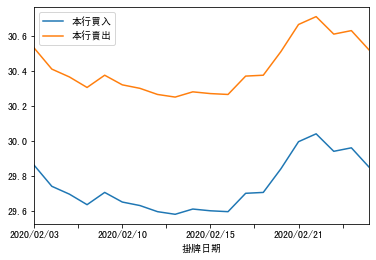

In [109]:
df.plot()

多個

Text(0.5, 1.0, 'USD')

Text(0.5, 1.0, 'HKD')

Text(0.5, 1.0, 'GBP')

Text(0.5, 1.0, 'AUD')

Text(0.5, 1.0, 'CAD')

Text(0.5, 1.0, 'SGD')

Text(0.5, 1.0, 'CHF')

Text(0.5, 1.0, 'JPY')

Text(0.5, 1.0, 'ZAR')

Text(0.5, 1.0, 'SEK')

Text(0.5, 1.0, 'NZD')

Text(0.5, 1.0, 'THB')

Text(0.5, 1.0, 'PHP')

Text(0.5, 1.0, 'IDR')

Text(0.5, 1.0, 'EUR')

Text(0.5, 1.0, 'KRW')

Text(0.5, 1.0, 'VND')

Text(0.5, 1.0, 'MYR')

Text(0.5, 1.0, 'CNY')

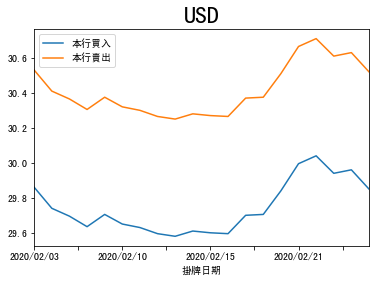

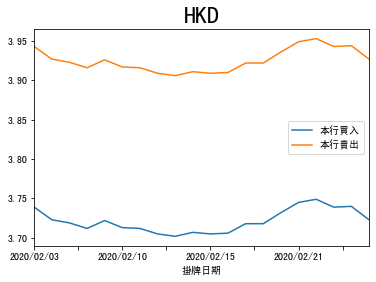

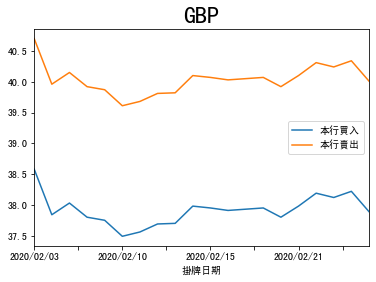

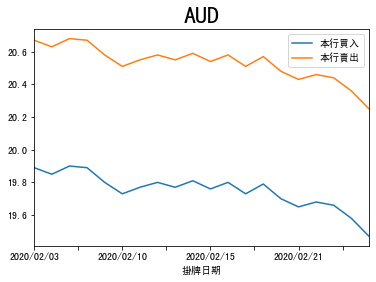

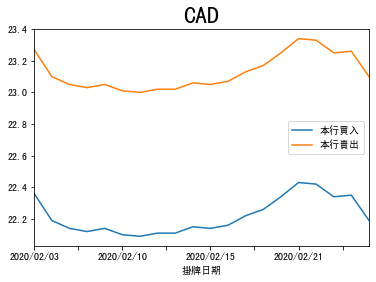

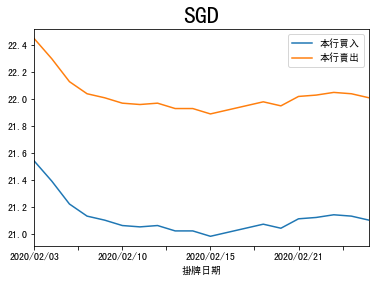

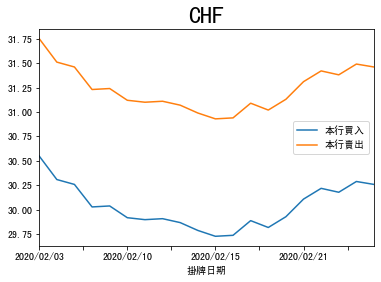

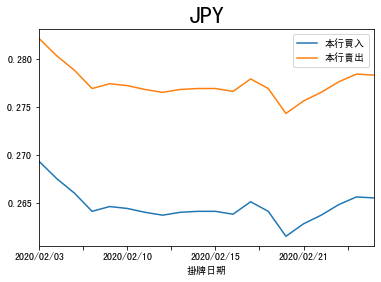

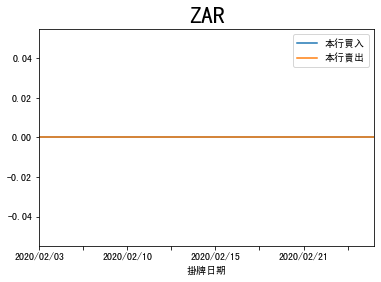

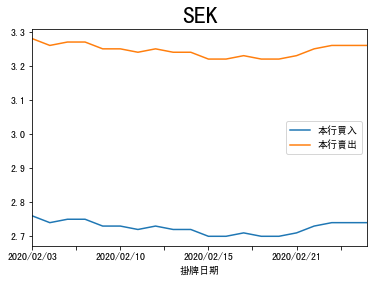

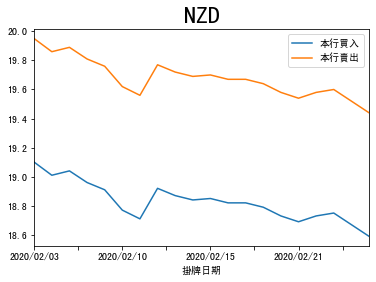

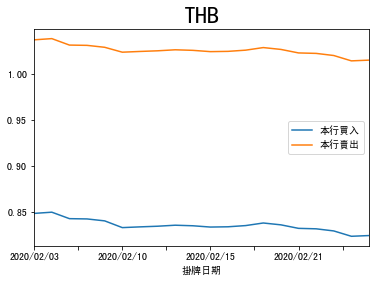

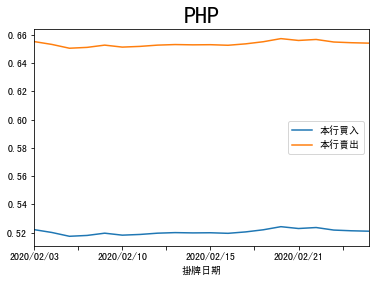

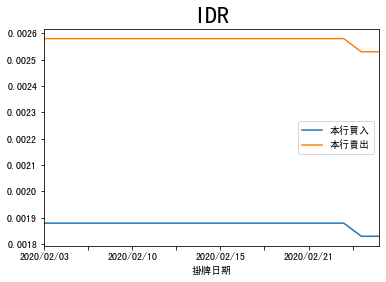

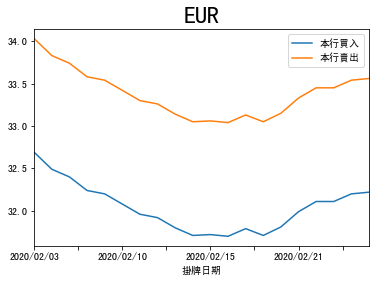

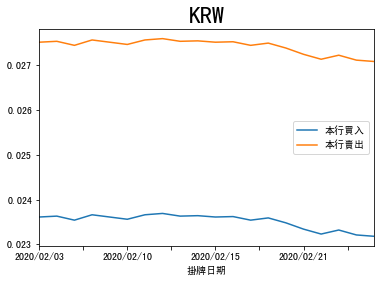

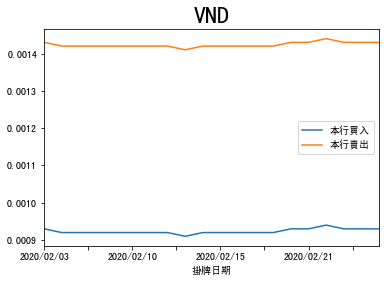

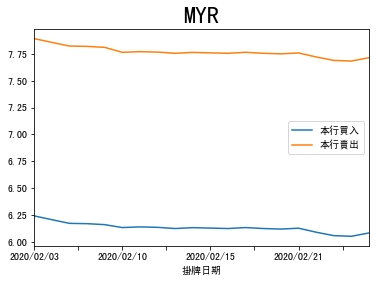

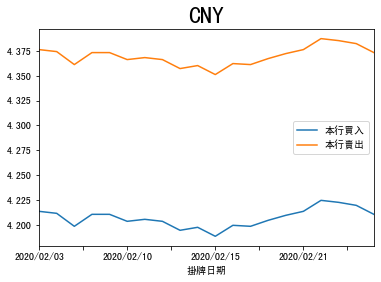

In [188]:
import re
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢其他貨幣對台幣的匯率
pattern = re.compile('.*(\w\w\w)') #美金(USD) → USD
for ele in rate_table:
    currency = ele.find(name='div', attrs={'class':'visible-phone print_hide'})
    currency_s = re.search(pattern, currency.get_text()).group(1)
    # 進入台灣銀行牌告匯率網頁，查看當日匯率資料
    date = '2020-02'
    url = f"https://rate.bot.com.tw/xrt/quote/{date}/{currency_s}"
    resp = requests.get(url)
    resp.encoding = 'utf-8'
    # print(resp.text)  # 如有需要，列印出網頁原始碼

    html = BeautifulSoup(resp.text, "lxml")

    dates = [x.text for x in html.select(".table-hover a")]
    buyin = list(map(float,[x.text for x in  html.select(".tablet_hide+ .text-right")]))
    sold = list(map(float,[x.text for x in  html.select(".print_table-cell+ .rate-content-cash.text-right")]))

    df = (pd.DataFrame({"掛牌日期":dates,
                       "本行買入":buyin,
                       "本行賣出":sold,
                      })
          .sort_values("掛牌日期",ascending=True)
          .set_index("掛牌日期"))

    ax = df.plot()
    ax.set_title(currency_s,fontsize=24)